In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('SalariesSimple - Salaries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1608 non-null   float64
 1   annual_base_pay         1651 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [4]:
df.dropna(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 1654
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1607 non-null   float64
 1   annual_base_pay         1607 non-null   float64
dtypes: float64(2)
memory usage: 37.7 KB


In [6]:
def testTrainSplit (df):
    length = len(df.index)
    splitPoint = round(length * 0.70)
    training = df.iloc[:splitPoint, :]
    testing = df.iloc[splitPoint:, :]
    return training, testing

In [7]:
training, testing = testTrainSplit (df)

In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 1158
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1125 non-null   float64
 1   annual_base_pay         1125 non-null   float64
dtypes: float64(2)
memory usage: 26.4 KB


In [9]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 1159 to 1654
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  482 non-null    float64
 1   annual_base_pay         482 non-null    float64
dtypes: float64(2)
memory usage: 11.3 KB


<AxesSubplot:xlabel='total_experience_years', ylabel='annual_base_pay'>

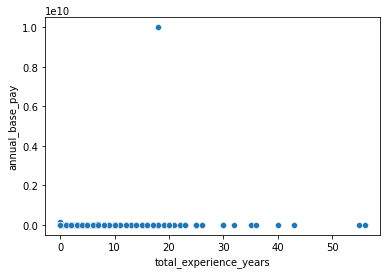

In [10]:
sns.scatterplot(data = df, x=df['total_experience_years'], y=df['annual_base_pay'])

In [11]:
def lineOfBestFit (df, lSlope, hSlope, lYIntercept, hYIntercept):
    whichIsBest = []
    b = -1
    for slope in range (lSlope, hSlope):
        for yIntercept in range (lYIntercept, hYIntercept): 
            dSum = 0
            for index, row in df.iterrows():
                x1 = row['total_experience_years'] 
                y1 = row['annual_base_pay']
                d = (abs(slope*x1 + b*y1 + yIntercept))/((slope**2 + b**2)**0.5)
                dSum = dSum + d
            template = {"Distance Sum": dSum, "Slope": slope, "Y-Intercept": yIntercept}
            whichIsBest.append(template)
    return whichIsBest

In [ ]:
whichIsBest = lineOfBestFit (training, 0, 100 + 1, 0, 165000 + 1)

In [ ]:
def findSmallestSum (whichIsBest):
    lowest = float ('inf')
    for sum in whichIsBest:
        if sum['Distance Sum'] < lowest:
            lowest = sum['Distance Sum']
            dictionary = sum
    return dictionary

In [ ]:
dictionary = findSmallestSum (whichIsBest)

In [ ]:
print(dictionary)